# Cài đặt môi trường

In [ ]:
!pip install pybind11
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install fastwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 16.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (27.6 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123105 files and

In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
import cv2
import pytesseract
import fastwer
import matplotlib.pyplot as plt

# Tesseract

Xây dựng hàm trích xuất văn bản với Tesseract \\
+ Nhận vào đường dẫn của ảnh
+ Chuyển sang ảnh xám
+ Gọi hàm pytesseract.image_to_string để trích xuất văn bản
+ Xử lý output (xóa ký tự xuống dòng và các ký tự rỗng)
+ Trả về output đã qua xử lý là kết quả trích xuất văn bản cuối cùng

In [ ]:
def OCR_Tesseract(img_path):
  # Đọc hình ảnh
  image = cv2.imread(img_path)
  # Chuyển đổi hình ảnh sang định dạng grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Sử dụng Tesseract để trích xuất văn bản
  text = pytesseract.image_to_string(gray)
  list_text = [i for i in text.split() if i != "" and i != '\n']
  return " ".join(list_text)

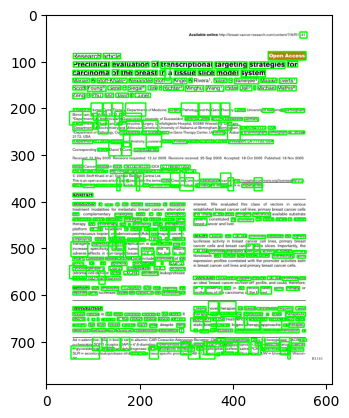

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Đường dẫn đến hình ảnh
image_path = "/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/tesseract/358522207_1471393557022160_5636686208408517966_n.jpg"

# Đọc hình ảnh
image = cv2.imread(image_path)

# Chuyển đổi hình ảnh sang định dạng grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Tesseract để trích xuất văn bản
results = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Lặp qua từng phần tử trong kết quả trích xuất
for i in range(0, len(results["text"])):
    # Trích xuất tọa độ bounding box của vùng văn bản từ kết quả hiện tại
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    # Trích xuất văn bản OCR cùng với độ tin cậy của vùng văn bản
    text = results["text"][i]
    conf = results["conf"][i]
    # Loại bỏ văn bản có độ tin cậy yếu
    if conf > 0.5:
        # Hiển thị độ tin cậy và văn bản trong terminal
        #print("Confidence: {}".format(conf))
        #print("Text: {}".format(text))
        #print("")
        # Loại bỏ các ký tự không thuộc ASCII để vẽ văn bản lên hình ảnh
        #text = cleanup_text(text)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
plt.imshow(image)

# Đánh giá


## Dùng hàm
Thư viện fastwer có hỗ trợ hàm để tính \\
+ CER fastwer.score_sent(predict, ground_truth, char_level=True)
+ WER fastwer.score_sent(predict, ground_truth) \\
Ngoài ra nhóm cũng có thử code hai hàm và kết quả theo 2 cách là giống nhau


In [ ]:
# Define reference text and output text
ref = 'my name my nana'
output = 'my name my name'

# Obtain Sentence-Level Character Error Rate (CER)
print(fastwer.score_sent(output, ref, char_level=True))
# Obtain Sentence-Level Word Error Rate (WER)
print(fastwer.score_sent(output, ref))

13.3333
25.0


## CER

In [ ]:
def calculate_cer(recognized_text, ground_truth):
    recognized_text = recognized_text.lower()
    ground_truth = ground_truth.lower()

    # Tính số lỗi ký tự
    num_errors = levenshtein_distance(recognized_text, ground_truth)

    # Tính tỷ lệ lỗi ký tự (CER)
    cer = num_errors / len(ground_truth) * 100

    return cer

def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)

    # Khởi tạo ma trận khoảng cách
    distance = [[0] * (n + 1) for _ in range(m + 1)]

    # Khởi tạo giá trị ban đầu
    for i in range(m + 1):
        distance[i][0] = i
    for j in range(n + 1):
        distance[0][j] = j

    # Tính toán khoảng cách
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            distance[i][j] = min(distance[i - 1][j] + 1,         # Xóa
                                 distance[i][j - 1] + 1,         # Chèn
                                 distance[i - 1][j - 1] + cost)  # Thay thế

    return distance[m][n]

# Kết quả nhận dạng và kết quả thực tế đã biết trước
recognized_text = "my name"
ground_truth = "my nana"

# Tính toán CER
cer = calculate_cer(recognized_text, ground_truth)

print(f"Character Error Rate (CER): {cer}%")

## WER

In [ ]:
import numpy as np

def calculate_wer(recognized_text, ground_truth):
    recognized_text = recognized_text.lower().split()
    ground_truth = ground_truth.lower().split()

    len_rec = len(recognized_text)
    len_gt = len(ground_truth)

    # Tạo ma trận khoảng cách
    distance = np.zeros((len_rec + 1, len_gt + 1))

    for i in range(len_rec + 1):
        distance[i][0] = i

    for j in range(len_gt + 1):
        distance[0][j] = j

    # Tính toán khoảng cách
    for i in range(1, len_rec + 1):
        for j in range(1, len_gt + 1):
            if recognized_text[i - 1] == ground_truth[j - 1]:
                cost = 0
            else:
                cost = 1
            distance[i][j] = min(distance[i - 1][j] + 1,         # Xóa
                                 distance[i][j - 1] + 1,         # Chèn
                                 distance[i - 1][j - 1] + cost)  # Thay thế

    # Tính tỷ lệ lỗi từ (WER)
    wer = distance[len_rec][len_gt] / len_gt * 100

    return wer
recognized_text = "my name"
ground_truth = "my nana"
wer = calculate_wer(recognized_text, ground_truth)


print(f"Word Error Rate (CER): {wer}%")

## Full hàm đánh giá

In [ ]:
import pandas as pd

### Đánh giá trên bộ dữ liệu là các văn bản khoa học

df sẽ chứa dữ liệu tên ảnh, ground_truth. Hàm sẽ thực hiện đọc dữ liệu và lưu kết quả đánh giá vào các cột còn lại

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/docimage.csv')
df.head(3)

,name,ground_truth,CER_tesseract,WER_tesseract,CER_second,WER_second
0,Samuel-01.jpg,Some Studies in Machine Learning\nUsing the Ga...,NaN,NaN,NaN,NaN
1,Samuel-02.jpg,explorations of every possible path through a ...,NaN,NaN,NaN,NaN
2,Samuel-04.jpg,The choice for the parameters to follow this f...,NaN,NaN,NaN,NaN


In [ ]:
sourcr_path = "/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/DOCimage"
for i in range(len(df)):
  img_name = df.iloc[i, 0]
  img_path = sourcr_path + '/' + str(img_name)
  s = df.iloc[i, 1].split()
  s1 = [i for i in s if i != '\n' and i != '']
  ground_truth = " ".join(s1)
  # tesseract
  tes_pre = OCR_Tesseract(img_path)
  df.iloc[i, 2] = fastwer.score_sent(tes_pre, ground_truth, char_level=True)
  df.iloc[i, 3] = fastwer.score_sent(tes_pre, ground_truth)

  # model khác
  # other_pre = OCR_other()
  # df.iloc[i, 4] = fastwer.score_sent(other_pre, ground_truth, char_level=True)
  # df.iloc[i, 5] = fastwer.score_sent(other_pre, ground_truth)


Vì model thứ 2 nhóm không thực nghiệm trên collab mà thực hiện trên kaggle nên các dữ liệu về model thứ 2 (WER_seconf, CER_second) sẽ được cập nhật lên sau

Sau khi có được kết quả đến giá CER và WER bằng thư viện tessertact thì tiến hành lưu lại kết quả

In [ ]:
df.to_csv('/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/docimage_result.csv', index=False)

### Đánh giá trên bộ dữ liệu được chụp từ sách
Quá trình thực hiện giống như bộ dữ liệu trên


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/camera.csv')
df.head(3)

,name,ground_truth,CER_tesseract,WER_tesseract,CER_second,WER_second
0,img1.jpg,UNIT 1: THE NATURAL WORLD\n(3) C\nLogging can ...,NaN,NaN,NaN,NaN
1,img2.jpg,to remain alive after their death\nthat I migh...,NaN,NaN,NaN,NaN
2,img3.jpg,London SE1 9GF\nThis edition published 2011\nA...,NaN,NaN,NaN,NaN


In [ ]:
sourcr_path = "/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/Camera"
for i in range(len(df)):
  img_name = df.iloc[i, 0]
  img_path = sourcr_path + '/' + str(img_name)
  s = df.iloc[i, 1].split()
  s1 = [i for i in s if i != '\n' and i != '']
  ground_truth = " ".join(s1)
  # tesseract
  tes_pre = OCR_Tesseract(img_path)
  df.iloc[i, 2] = fastwer.score_sent(tes_pre, ground_truth, char_level=True)
  df.iloc[i, 3] = fastwer.score_sent(tes_pre, ground_truth)

  # model khác
  # other_pre = OCR_other()
  # df.iloc[i, 4] = fastwer.score_sent(other_pre, ground_truth, char_level=True)
  # df.iloc[i, 5] = fastwer.score_sent(other_pre, ground_truth)



In [ ]:
df.to_csv('/content/drive/MyDrive/CS114-Máy học/Đồ án cuối kỳ/Evaluate Data/camera_result.csv', index=False)